# Question

Q2) Build a Multiclass classifier using the CNN model. Use MNIST or any other suitabledataset. a. Perform Data Pre-processing b. Define Model and perform training c.Evaluate Results using confusion matrix

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Reshape for CNN input and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

In [31]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9909 - loss: 2.6409 - val_accuracy: 0.9885 - val_loss: 2.0937
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9943 - loss: 0.5141 - val_accuracy: 0.9910 - val_loss: 1.0687
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9950 - loss: 0.3242 - val_accuracy: 0.9895 - val_loss: 1.1710
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9958 - loss: 0.1858 - val_accuracy: 0.9880 - val_loss: 1.2238
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9966 - loss: 0.1322 - val_accuracy: 0.9897 - val_loss: 0.9605


In [32]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9860 - loss: 0.8835
Test Accuracy: 99.00%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


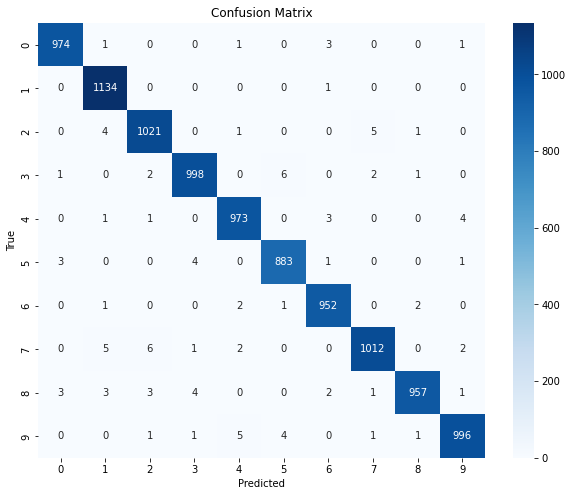

In [33]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Question

Q13) To better target their marketing strategies, a real estate agency wants to classify houses
into price categories: Low, Medium, and High. Build a Convolutional Neural Network
(CNN) to classify houses based on the features provided in the dataset.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [41]:
# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Drop non-numeric column
df.drop(columns=['Address'], inplace=True)

# Categorize price into Low, Medium, High based on percentiles
price_percentiles = np.percentile(df['Price'], [33.33, 66.67])
df['PriceCategory'] = pd.cut(df['Price'],
                             bins=[-np.inf, price_percentiles[0], price_percentiles[1], np.inf],
                             labels=['Low', 'Medium', 'High'])

# Encode price category labels
le = LabelEncoder()
df['PriceCategoryEncoded'] = le.fit_transform(df['PriceCategory'])

In [42]:
# Prepare features and labels
X = df.drop(columns=['Price', 'PriceCategory', 'PriceCategoryEncoded']).values
y = df['PriceCategoryEncoded'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Build CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 output classes
])

C:\Users\niraj_1kwckht\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5557 - loss: 0.9361 - val_accuracy: 0.7100 - val_loss: 0.6458
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7006 - loss: 0.6474 - val_accuracy: 0.7275 - val_loss: 0.5858
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.6289 - val_accuracy: 0.7225 - val_loss: 0.5683
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7270 - loss: 0.5937 - val_accuracy: 0.7325 - val_loss: 0.5499
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.5791 - val_accuracy: 0.7425 - val_loss: 0.5312
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7406 - loss: 0.5680 - val_accuracy: 0.7600 - val_loss: 0.5172
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7569 - loss: 0.5467 - val_accuracy: 0.7675 - val_loss: 0.5038
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.5394 - val_accuracy: 0.

In [47]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8190 - loss: 0.4314
Test Accuracy: 0.81


In [50]:
# Predict and show confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        High       0.84      0.85      0.85       334
         Low       0.89      0.85      0.87       333
      Medium       0.71      0.73      0.72       333

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



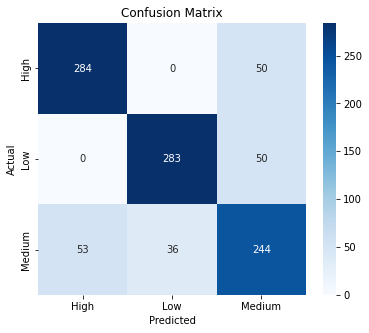

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()